**Statistical Analysis by Team UXplorers**

This code is for the A/B test in project 3. I have tweaked the dataset from Kaggle a bit to fit our story better (switch control and variant).

In [1]:
# import necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from numpy import random
from scipy import stats
from scipy.stats import chi2_contingency

warnings.simplefilter("ignore")

In [10]:
# read dataset
df = pd.read_csv('C:/Users/zhuda/OneDrive - The Ohio State University/Erdos Institute/ux-research-summer-2025/AB_Test_Results_0623.csv')

In [11]:
df

,USER_ID,VARIANT_NAME,REVENUE
0,737,control,0.0
1,2423,variant,0.0
2,9411,variant,0.0
3,7311,variant,0.0
4,6174,control,0.0
...,...,...,...
9995,1981,variant,0.0
9996,502,control,0.0
9997,9214,control,0.0
9998,7741,variant,0.0


In [18]:
# separate into two groups
control = df['REVENUE'][df['VARIANT_NAME'] == 'control']
variant = df['REVENUE'][df['VARIANT_NAME'] == 'variant']

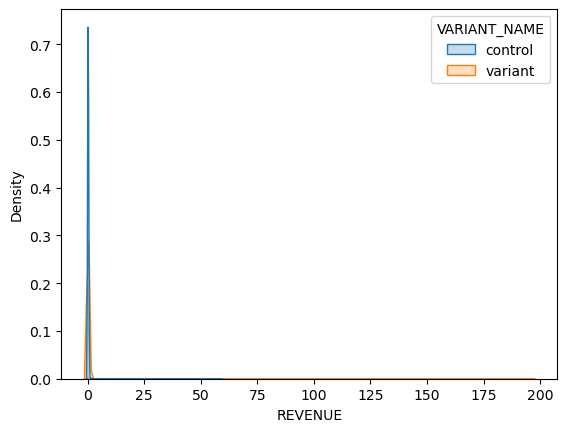

In [14]:
# create a density plot of the data
fig = sns.kdeplot(data=df, x='REVENUE', hue='VARIANT_NAME', shade=True)
#fig.set_xlim(500,525)
plt.show()

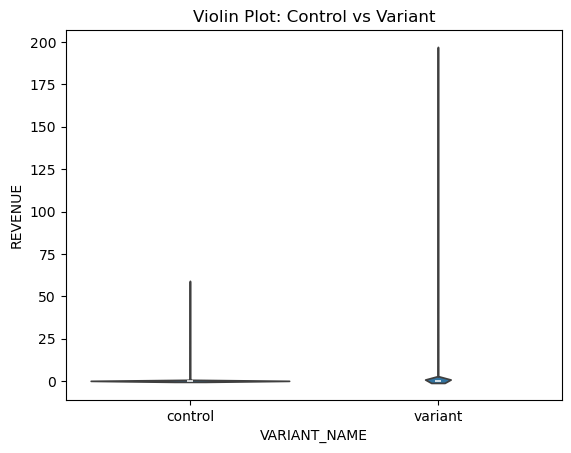

In [15]:
sns.violinplot(x='VARIANT_NAME', y='REVENUE', data=df)
plt.title('Violin Plot: Control vs Variant')
plt.show()

In [23]:
# descriptive statistics
print("Mean: Control=", round(np.mean(control),3), ", Variant=", round(np.mean(variant),3))
print("Median: Control=", np.median(control), ", Variant=", np.median(variant))
print("Range: Control=", np.min(control),"-", np.max(control), ", Variant=", np.min(variant),"-", np.max(variant))
print("Standard deviation: Control=", round(np.std(control),3), ", Variant=", round(np.std(variant),3))

Mean: Control= 0.07 , Variant= 0.129
Median: Control= 0.0 , Variant= 0.0
Range: Control= 0.0 - 58.63 , Variant= 0.0 - 196.01
Standard deviation: Control= 1.315 , Variant= 3.007


In [28]:
# conduct independent sample t-test
t_statistic, p_value = stats.ttest_ind(control, variant, alternative='less')
print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")

T-statistic: -1.271, P-value: 0.102


However, we want to check the assumptions of t-test are met first to choose proper statistical tests.

In [16]:
# check normality
_, p_a = stats.shapiro(control)
_, p_b = stats.shapiro(variant)
print(f"Normality p-values: Control={p_a:.3f}, Variant={p_b:.3f}")

Normality p-values: Control=0.000, Variant=0.000


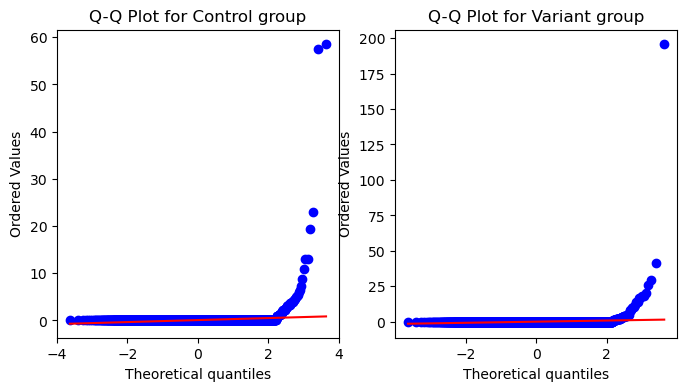

In [27]:
# qq plot
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

stats.probplot(control, plot=ax1)
ax1.set_title("Q-Q Plot for Control group")

stats.probplot(variant, plot=ax2)
ax2.set_title("Q-Q Plot for Variant group")

plt.show()

Since both p-values of Shapiro test are smaller than 0.05 and the Q-Q plots look weird, both groups violate normality assumption. We use Mann-Whitney U test.

In [29]:
#try non-parametric version t-test: Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(control, variant, alternative='less')
print(f"U-statistic: {u_stat}, P-value: {p_value:.3f}")

U-statistic: 12478180.0, P-value: 0.239


p > 0.05, fail to reject the null